In [101]:
from COS_Funcs.baseline import read_data

# old CURE implementation
import COS_Funcs.cure_old as cure_old

# CURE implementation + MD + lighter distance measurement
import COS_Funcs.cure as cure

# CURE + MD + KD-Tree : according to pyclustering
import COS_Funcs.cure_kdtree as cure_kdtree

import COS_Funcs.visualize as V
from COS_Funcs.dist import calc_cov_i,calc_dist,fast_dist
import COS_Funcs.utils as utils
import COS_Funcs.clusterings as clusterings

import time
import numpy

from pyclustering.cluster.cure import cure as pyc_cure
import matplotlib.pyplot as plt

In [100]:
# import COS_Funcs.baseline as baseline
import importlib
importlib.reload(baseline)
# importlib.reload(dist)

<module 'COS_Funcs.baseline' from 'E:\\罗兰大学课程\\研二\\Lab2\\COS_workspace\\COS_Funcs\\baseline.py'>

In [63]:
def show_subs(clusters,titles,suptitle):
    plt.figure(figsize=(4*len(clusters),4))
    for index,(cluster,title) in enumerate(zip(clusters,titles)):
        plt.subplot(1,len(clusters),index+1)
        V.show_clusters(cluster)
        plt.title(title)
    plt.suptitle(suptitle)

In [68]:
# Use pyclustering as ground truth
class Cluster:
    def __init__(self,index,points,rep_points,center):
        self.index = index
        self.points = points
        self.rep_points = rep_points
        self.center = 0
#         self.labels = []
#         self.num = 0
#         self.center = 0
#         self.c = c

def pyclustering_cure(X,N,c,alpha,ccore):
    cure = pyc_cure(X,N,c,alpha,ccore)
    cure.process()
    clusters_ = []
    for index,rep_points,center in zip(cure.get_clusters(),cure.get_representors(),cure.get_means()):
        points = X[index]
        clusters_.append(Cluster(index,points,rep_points,center))
    return clusters_

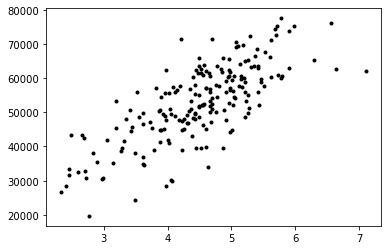

In [17]:
# Make fake data (related for testing MD)
X_fake,_ = utils.makeData(200)
V.show_2d_scatter(X_fake)
X_fake_ss  = utils.standard(X_fake)

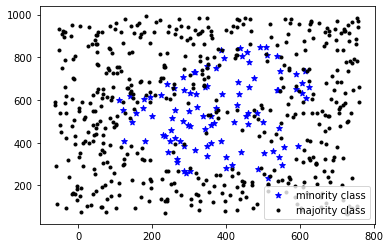

In [102]:
# Read 2D data
X_2D,y = read_data('Datasets/','sampledata1',norm=False)
V.show_2d_scatter(X_2D,y)
X_2D_ss = utils.standard(X_2D)

##### Test CURE+KD-Tree works or not on L = 2 (Euclidean distance)

Both the pyclustering(pycore) and our kd+cure can not work very precisely (might caused by python's feature)

In [117]:
N = 6
c = 3
alpha = 0.5

# In KD-Tree's case, only single can be implemented
linkage = 'cure_single'  

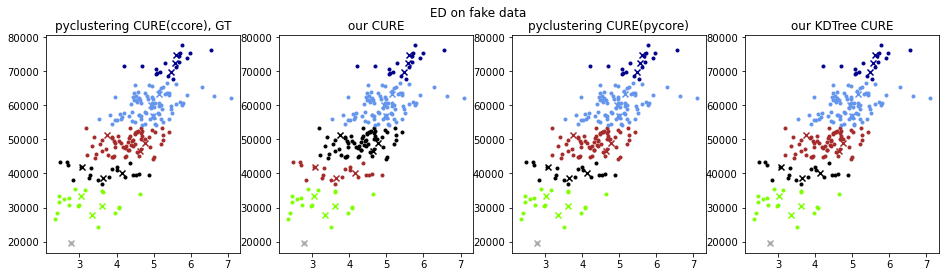

In [119]:
X = X_fake

title = 'ED on fake data'
clusters = []
titles = []

cluster = pyclustering_cure(X,N,c,alpha,ccore=True)
clusters.append(cluster)
titles.append('pyclustering CURE(ccore), GT')

cluster,all_reps,num_reps = cure.Cure(X,N,c,alpha,linkage=linkage,L=2,visualize = False)
clusters.append(cluster)
titles.append('our CURE')

cluster = pyclustering_cure(X,N,c,alpha,ccore=False)
clusters.append(cluster)
titles.append('pyclustering CURE(pycore)')

cure_ = cure_kdtree.Cure(N,c,alpha,linkage=linkage,L=2,visualize = False)
cluster,all_reps,num_reps = cure_.fit(X)
clusters.append(cluster)
titles.append('our KDTree CURE')

show_subs(clusters,titles,title)

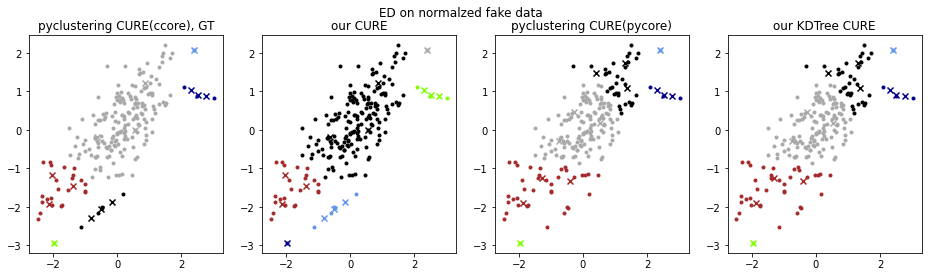

In [120]:
X = X_fake_ss

title = 'ED on normalzed fake data'
clusters = []
titles = []

cluster = pyclustering_cure(X,N,c,alpha,ccore=True)
clusters.append(cluster)
titles.append('pyclustering CURE(ccore), GT')

cluster,all_reps,num_reps = cure.Cure(X,N,c,alpha,linkage=linkage,L=2,visualize = False)
clusters.append(cluster)
titles.append('our CURE')

cluster = pyclustering_cure(X,N,c,alpha,ccore=False)
clusters.append(cluster)
titles.append('pyclustering CURE(pycore)')

cure_ = cure_kdtree.Cure(N,c,alpha,linkage=linkage,L=2,visualize = False)
cluster,all_reps,num_reps = cure_.fit(X)
clusters.append(cluster)
titles.append('our KDTree CURE')

show_subs(clusters,titles,title)

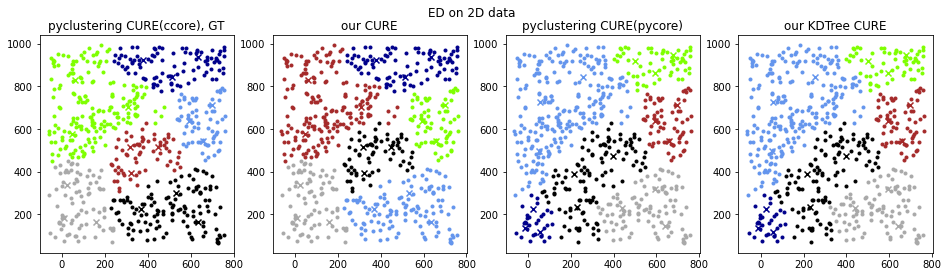

In [121]:
X = X_2D

title = 'ED on 2D data'
clusters = []
titles = []

cluster = pyclustering_cure(X,N,c,alpha,ccore=True)
clusters.append(cluster)
titles.append('pyclustering CURE(ccore), GT')

cluster,all_reps,num_reps = cure.Cure(X,N,c,alpha,linkage=linkage,L=2,visualize = False)
clusters.append(cluster)
titles.append('our CURE')

cluster = pyclustering_cure(X,N,c,alpha,ccore=False)
clusters.append(cluster)
titles.append('pyclustering CURE(pycore)')

cure_ = cure_kdtree.Cure(N,c,alpha,linkage=linkage,L=2,visualize = False)
cluster,all_reps,num_reps = cure_.fit(X)
clusters.append(cluster)
titles.append('our KDTree CURE')

show_subs(clusters,titles,title)

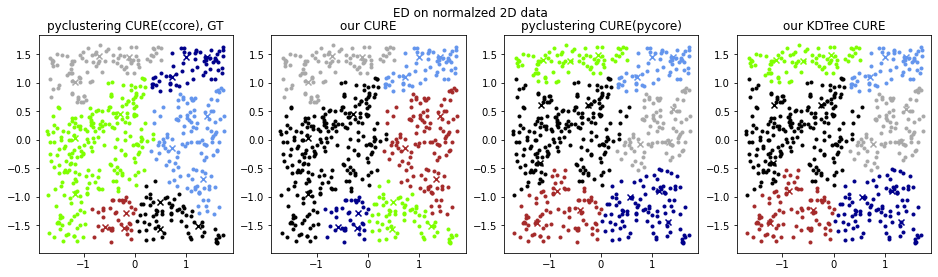

In [122]:
X = X_2D_ss

title = 'ED on normalzed 2D data'
clusters = []
titles = []

cluster = pyclustering_cure(X,N,c,alpha,ccore=True)
clusters.append(cluster)
titles.append('pyclustering CURE(ccore), GT')

cluster,all_reps,num_reps = cure.Cure(X,N,c,alpha,linkage=linkage,L=2,visualize = False)
clusters.append(cluster)
titles.append('our CURE')

cluster = pyclustering_cure(X,N,c,alpha,ccore=False)
clusters.append(cluster)
titles.append('pyclustering CURE(pycore)')

cure_ = cure_kdtree.Cure(N,c,alpha,linkage=linkage,L=2,visualize = False)
cluster,all_reps,num_reps = cure_.fit(X)
clusters.append(cluster)
titles.append('our KDTree CURE')

show_subs(clusters,titles,title)

##### Test CURE+KD-Tree works or not on L = 3 (Mahalanobis Distance)

Same issue: On normalized data(more fractional digits) our kd+cure can not work very precisely

In [127]:
N = 6
c = 3
alpha = 0.5

linkage = 'cure_single'  

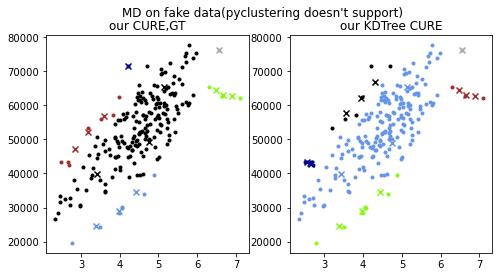

In [128]:
X = X_fake

title = 'MD on fake data(pyclustering doesn\'t support)'
clusters = []
titles = []

cluster,all_reps,num_reps = cure.Cure(X,N,c,alpha,linkage=linkage,L=3,visualize = False)
clusters.append(cluster)
titles.append('our CURE,GT')

cure_ = cure_kdtree.Cure(N,c,alpha,linkage=linkage,L=3,visualize = False)
cluster,all_reps,num_reps = cure_.fit(X)
clusters.append(cluster)
titles.append('our KDTree CURE')

show_subs(clusters,titles,title)

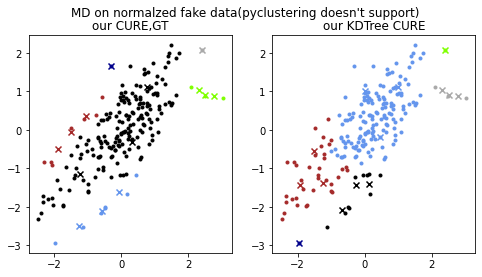

In [129]:
X = X_fake_ss

title = 'MD on normalzed fake data(pyclustering doesn\'t support)'
clusters = []
titles = []

cluster,all_reps,num_reps = cure.Cure(X,N,c,alpha,linkage=linkage,L=3,visualize = False)
clusters.append(cluster)
titles.append('our CURE,GT')

cure_ = cure_kdtree.Cure(N,c,alpha,linkage=linkage,L=3,visualize = False)
cluster,all_reps,num_reps = cure_.fit(X)
clusters.append(cluster)
titles.append('our KDTree CURE')

show_subs(clusters,titles,title)

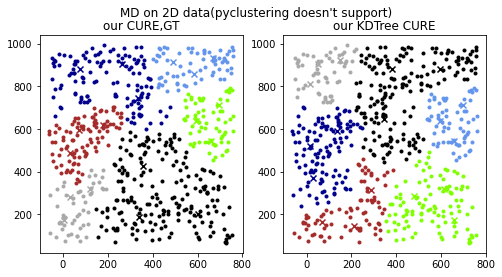

In [130]:
X = X_2D

title = 'MD on 2D data(pyclustering doesn\'t support)'
clusters = []
titles = []

cluster,all_reps,num_reps = cure.Cure(X,N,c,alpha,linkage=linkage,L=3,visualize = False)
clusters.append(cluster)
titles.append('our CURE,GT')

cure_ = cure_kdtree.Cure(N,c,alpha,linkage=linkage,L=3,visualize = False)
cluster,all_reps,num_reps = cure_.fit(X)
clusters.append(cluster)
titles.append('our KDTree CURE')

show_subs(clusters,titles,title)

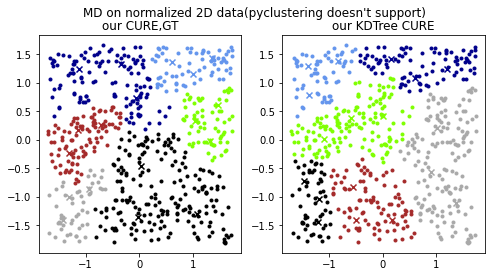

In [131]:
X = X_2D_ss

title = 'MD on normalized 2D data(pyclustering doesn\'t support)'
clusters = []
titles = []

cluster,all_reps,num_reps = cure.Cure(X,N,c,alpha,linkage=linkage,L=3,visualize = False)
clusters.append(cluster)
titles.append('our CURE,GT')

cure_ = cure_kdtree.Cure(N,c,alpha,linkage=linkage,L=3,visualize = False)
cluster,all_reps,num_reps = cure_.fit(X)
clusters.append(cluster)
titles.append('our KDTree CURE')

show_subs(clusters,titles,title)

##### Test speed

In [137]:
# Read a real data (biggest one)
X_real,y = read_data('Datasets/','Breast',norm=False)
# V.show_2d_scatter(X_2D,y)
X_real_ss = utils.standard(X_real)

In [147]:
N = 30
c = 3
alpha = 0.5

linkage = 'cure_single'  

L = 2 (Euclidean distance)

In [148]:
%%time
clusters_l2,all_reps,num_reps = cure.Cure(X_real,N,c,alpha,linkage=linkage,L=2,visualize = False)

CPU times: total: 40 s
Wall time: 47 s


In [149]:
%%time
cure_ = cure_kdtree.Cure(N,c,alpha,linkage=linkage,L=2,visualize = False)
clusters_kd_l2,all_reps,num_reps = cure_.fit(X_real)

CPU times: total: 22.9 s
Wall time: 26.1 s


L = 3 (Mahalanobis distance)

In [150]:
%%time
clusters_l3,all_reps,num_reps = cure.Cure(X_real,N,c,alpha,linkage=linkage,L=3,visualize = False)

CPU times: total: 16.4 s
Wall time: 19.7 s


In [152]:
%%time
cure_ = cure_kdtree.Cure(N,c,alpha,linkage=linkage,L=3,visualize = False)
clusters_kd_l3,all_reps,num_reps = cure_.fit(X_real)

CPU times: total: 1min 26s
Wall time: 1min 36s


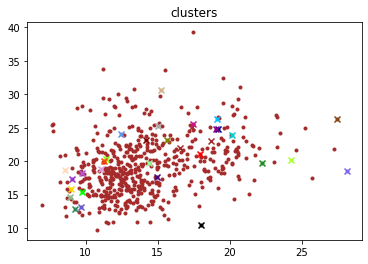

In [155]:
V.show_clusters(clusters_l3)
plt.show()

In [161]:
%%time
clusters_l3,all_reps,num_reps = cure.Cure(X_2D,N,c,alpha,linkage=linkage,L=3,visualize = False)

CPU times: total: 14.6 s
Wall time: 16.1 s


In [162]:
%%time
cure_ = cure_kdtree.Cure(N,c,alpha,linkage=linkage,L=3,visualize = False)
clusters_kd_l3,all_reps,num_reps = cure_.fit(X_2D)

CPU times: total: 18.2 s
Wall time: 19.4 s


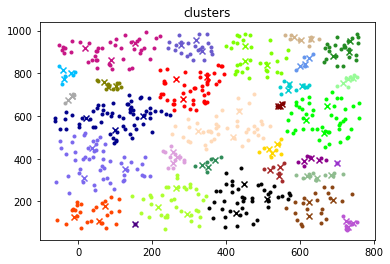

In [166]:
V.show_clusters(clusters_kd_l3)
plt.show()

The KD-Tree on MD is not fast, check other datasets

In [234]:
# Read a real data (biggest one)
X_other,y = read_data('Datasets/','leaf',norm=False)
# V.show_2d_scatter(X_2D,y)
X_other_ss = utils.standard(X_other)

In [243]:
N=30

In [252]:
%%time
clusters_l3,all_reps,num_reps = cure.Cure(X_other,N,c,alpha,linkage=linkage,L=3,visualize = False)

CPU times: total: 3.36 s
Wall time: 3.67 s


In [251]:
%%time
cure_ = cure_kdtree.Cure(N,c,alpha,linkage=linkage,L=3,visualize = False)
clusters_kd_l3,all_reps,num_reps = cure_.fit(X_other)

CPU times: total: 9.72 s
Wall time: 12.4 s


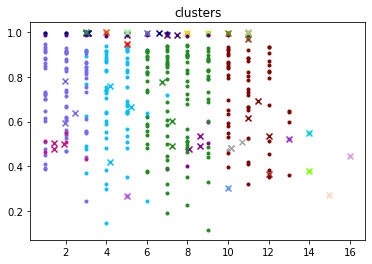

In [248]:
V.show_clusters(clusters_kd_l3)
plt.show()

# SAMPLE SIZE

N | SIZE | OLD SIZE


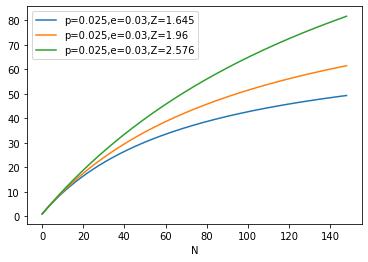

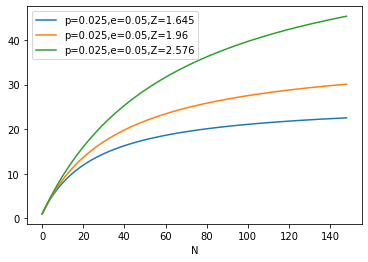

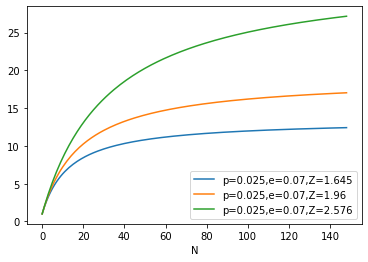

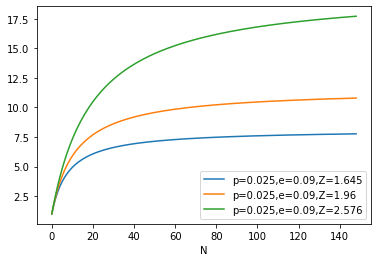

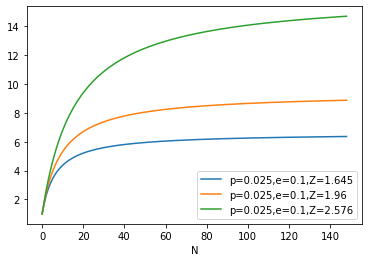

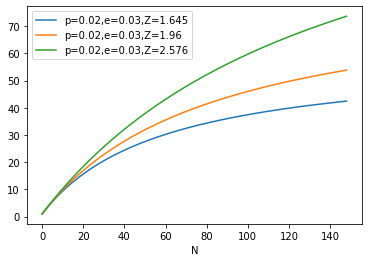

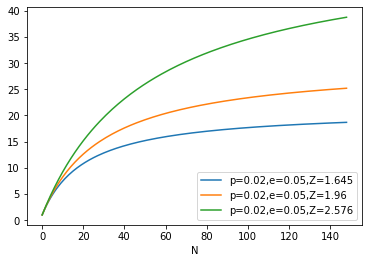

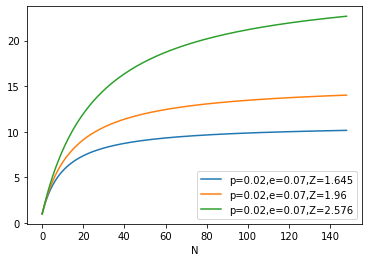

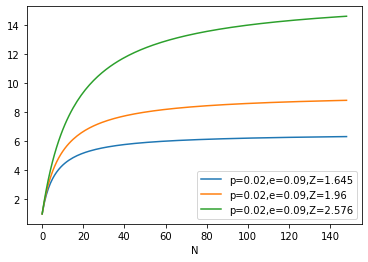

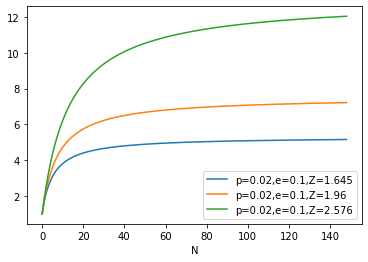

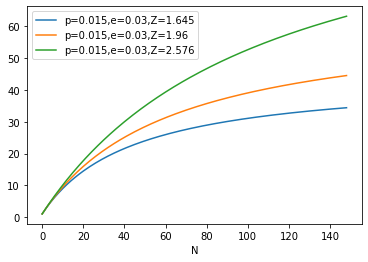

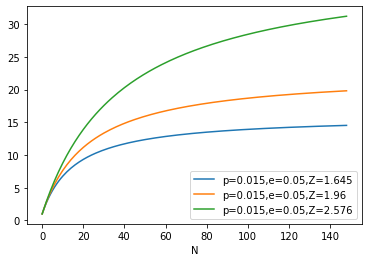

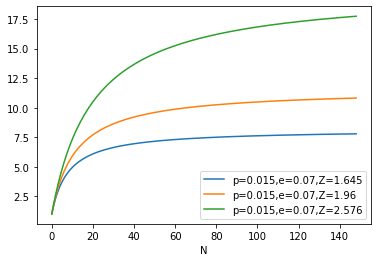

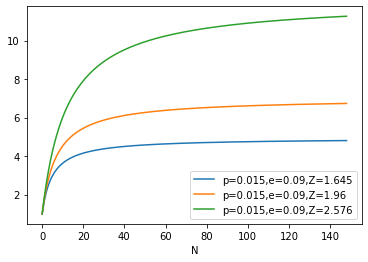

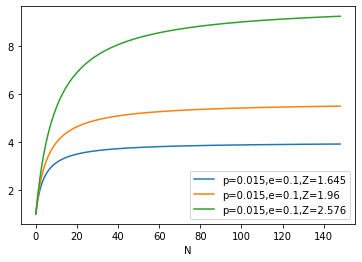

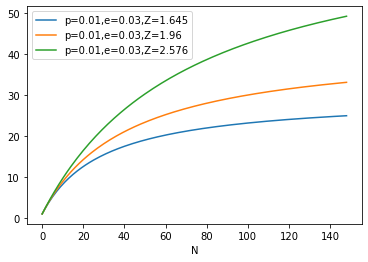

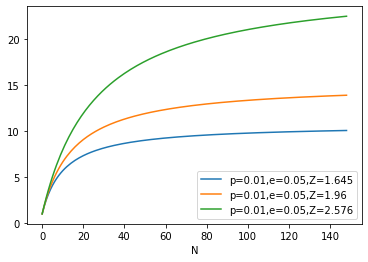

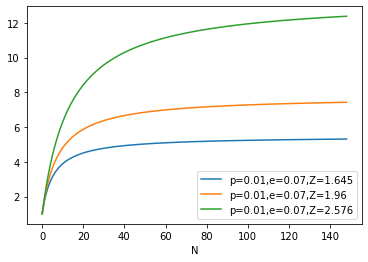

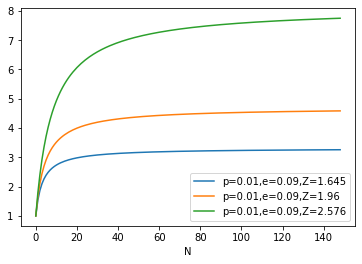

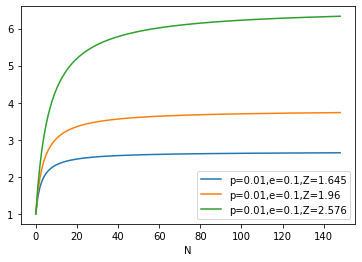

In [233]:
print('N | SIZE | OLD SIZE')

size2s = []
for p in [0.025,0.02,0.015,0.01]:
    for e in [0.03,0.05,0.07,0.09,0.1]:
        for Z in [1.645,1.96,2.576]:
            size1s = []
            for N in range(1,150):


        #         Z = 1.96
        #         e = 0.05
        #         p = 0.015


                x = (Z**2 * p * (1-p)) / (e**2)
                size1 = (N * x) / (x + N - 1)
                size2 = x / (1 + x/N)

                size1s.append(size1)
#                 size2s.append(size2)

        #         # Original one
        #         Z_score = 2.58
        #         margin_error = 0.05
        #         std_dev = 0.015

        #         size3 = ((Z_score**2 * std_dev * (1-std_dev)) / (margin_error**2)) / (1 + ((Z_score**2 * std_dev * (1-std_dev))/(margin_error**2 * N)))



#         print(N,"|",round(size1,2),"|",round(size3,2))
            plt.plot(size1s,label = 'p='+str(p)+',e='+str(e)+',Z='+str(Z))
        plt.xlabel('N')
        plt.legend()
        plt.show()
# plt.plot(size2s,alpha=0.5)
